### Step 1: Load Data & import libraries

In [2]:
import numpy as np
import pandas as pd 

In [ ]:
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\01-simple-linear-reg\anscombe.csv", usecols=["x","y"])
df

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


### Step 2: EDA + Preprocessing + Train test split

#### Basic EDA

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       44 non-null     float64
 1   y       44 non-null     float64
dtypes: float64(2)
memory usage: 836.0 bytes


In [24]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [25]:
df.shape

(44, 2)

#### Preprocessing
- Handling Missing Values (Remove | Impute)
- Handling Outliers
- Encoding Categorical Features


In [26]:
df.isnull().sum()

x    0
y    0
dtype: int64

<Axes: ylabel='Density'>

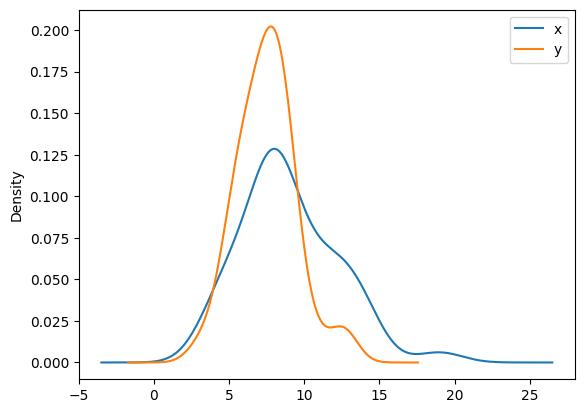

In [34]:
df.plot(kind='kde')

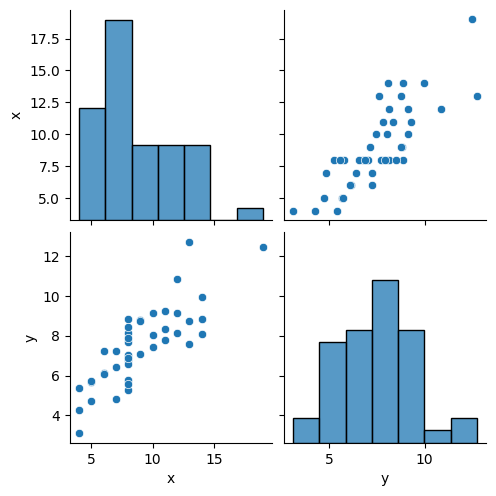

In [31]:
import seaborn as sns 
sns.pairplot(data=df)

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35,), (9,), (35,), (9,))

In [13]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 1), (9, 1), (35, 1), (9, 1))

### Step 3: Training the Model

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

### Step 4: Predict and Evaluate

In [40]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lr.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.34122216981744313
3.283301533883998


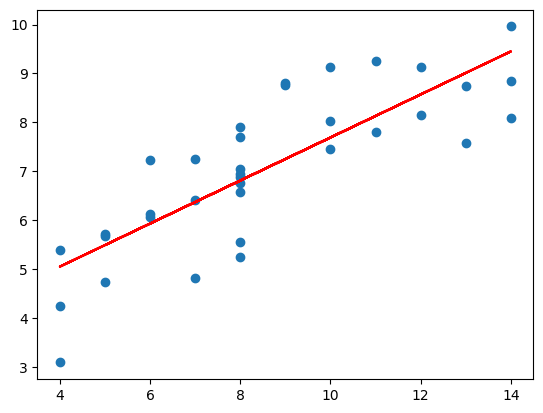

In [57]:
import matplotlib.pyplot as plt 

plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color="red")
# plt.plot(X_test, lr.predict(X_test), color="green")

### Step 5: Y_intercept and Slope

In [59]:
m = lr.coef_
c = lr.intercept_
x = 10 # Trying with new input
y = m * x + c 
y

array([[7.69321293]])

## Case of Overfitting 

R² score: 0.6848565344815188


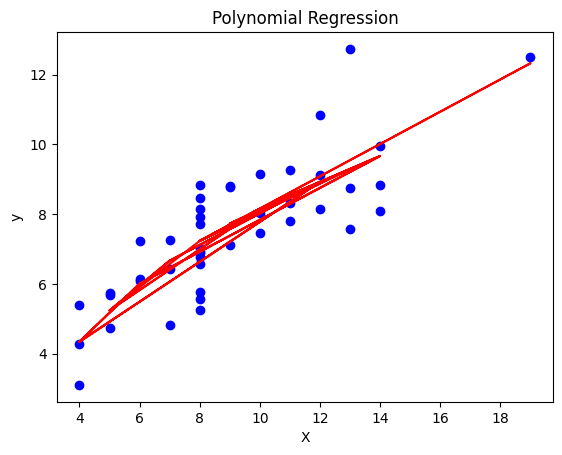

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Given data
X = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5, 10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5, 10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5, 8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]).reshape(-1, 1)
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, 9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74, 7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73, 6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

# Reshape X for polynomial fitting
poly = PolynomialFeatures(degree=3)  # Try higher degrees for better fitting
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict and calculate R² score
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
print(f"R² score: {r2}")

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.show()


### End of Task